# Punto 1 Monte Carlo simulations

In [9]:
#Zona de importaciones
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.rcParams['figure.figsize'] = (17.0, 4.0)

In [10]:
#Simulo los lanzamientos escogiendo un número aleatorio entre 1 y 100
def lanzamiento():
    num = random.randint(1,100)
    if 1<=num<=51:
        return False;
    else:
        return True;


In [11]:
#Definimos al función de la apuesta
#x=número de apuestas en una simulación
#dinero=dinero con el que empieza
#monto_apuesta=lo que se gana/pierde
#montos= almacena todos los montos que se van teniendo por simulación

def apuesta(x,dinero,monto_apuesta,montos):
    temp = dinero
    for i in range(x):
        if lanzamiento():
            temp = temp + monto_apuesta
        else:
            temp = temp - monto_apuesta
    montos.append(temp)
    return montos

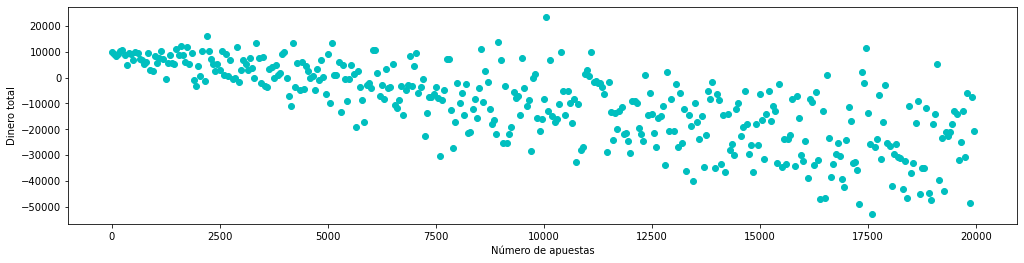

In [13]:

num_simulaciones = 20000
rep = np.arange(0,20000,50)
montos = []
#Ciclo para llamar a la función apuesta
for i in range(0,20000,50):
   apuesta(i,10000,100,montos)


#Gráficamos el número de apuestas vs el Dinero total
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Número de apuestas")
ax.set_ylabel("Dinero total")
#ax.plot(rep, montos, '-r', alpha = 0.5)
ax.plot(rep, montos,'co')


Podemos observar que cuando el jugador reliza más puestas, hay una tendencia a perder. Por otro lado, si el jugador no realizara tantas apuestas, tendría más chance de ganar(quedarse) con algo de dinero, pero aún así, estaría esa probabilidad de perder. <strong>Nota</strong>  <i>Esto de cierta manera muestra que enviciarse en los juegos de azar no trae "ganancias", en cambio tiende a traer más "perdidas"</i>

# Punto 2 Markov Chain

In [30]:
import numpy as np
import random as rm
#Definimos los estados
states = ["Thank","you","for","your","help","all","assistance","everything","end"]

#Sacamos aquellos estados con probabilidad de aparecer
transitionName = [["","TY","","","","","","",""],
                  ["","","YF","","","","","","YE"],
                  ["","","","FY","","FA","","FE",""],
                  ["","","","","YH","","YA","",""],
                  ["","","","","","","","","HE"],
                  ["","","","AY","","","","",""],
                  ["","","","","","","","","AE"],
                  ["","","","","","","","","EE"],
                  ["","","","","","","","","EE"]]

#Probabilidad de los estados
transitionMatrix =  [[0,1,0,0,0,0,0,0,0],
                    [0,0,0.8,0,0,0,0,0,0.2],
                    [0,0,0,0.5,0,0.25,0,0.25,0],
                    [0,0,0,0,0.66,0,0.34,0,0],
                    [0,0,0,0,0,0,0,0,1],
                    [0,0,0,1,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,0,0,1]]

#Verificamos que la matriz se encuentra bien definida   

suma = 0
for i in range(9):
  suma += sum(transitionMatrix[i])

if suma != 9:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [83]:
def Frases():
  pal = "Thank"
  #print("Start state: " + pal)
  Lista_pal = [pal]
  while pal != "end":
    if pal == "Thank":
      change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
      if change == "TY":
          pal = "you"
          Lista_pal.append("you")
          pass
    elif pal == "you":
      change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
      if change == "YF":
        pal = "for"
        Lista_pal.append("for")
        pass
      elif change == "YE":
        pal = "end" 
        Lista_pal.append("end")
    elif pal == "for":
      change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
      if change == "FY":
        pal = "your"
        Lista_pal.append("your")
        pass
      elif change == "FA":
        pal = "all"
        Lista_pal.append("all")
      elif change == "FE":
        pal = "everything"
        Lista_pal.append("everything")
    elif pal == "your":
      change = np.random.choice(transitionName[3],replace=True,p=transitionMatrix[3])
      if change == "YH":
        pal = "help"
        Lista_pal.append("help")
        pass
      elif change == "YA":
        pal = "assistance"
        Lista_pal.append("assistance")
    elif pal == "help":
      change = np.random.choice(transitionName[4],replace=True,p=transitionMatrix[4])
      if change == "HE":
        pal = "end"
        Lista_pal.append("end")
        pass
    elif pal == "all":
      change = np.random.choice(transitionName[5],replace=True,p=transitionMatrix[5])
      if change == "AY":
        pal = "your"
        Lista_pal.append("your")
        pass
    elif pal == "assistance":
      change = np.random.choice(transitionName[6],replace=True,p=transitionMatrix[6])
      if change == "AE":
        pal = "end"
        Lista_pal.append("end")
        pass
    elif pal == "everything":
      change = np.random.choice(transitionName[7],replace=True,p=transitionMatrix[7])
      if change == "EE":
        pal = "end"
        Lista_pal.append("end")
        pass
    elif pal == "end":
      change = np.random.choice(transitionName[8],replace=True,p=transitionMatrix[8])
      if change == "EE":
        pal = "end"
        Lista_pal.append("end")
        pass
    
  return Lista_pal

Frases()

['Thank', 'you', 'end']

In [84]:
#Creamos una lista de frases
count = 0
lista_frases = []
veces = 10000
#Sacamos todas las frases posibles después de llamar la función un número "veces"
for iterations in range(1,veces):
        lista_frases.append(Frases())

#Podemos verificar las frases generadas
#print(lista_frases)    
        
#De la lista de palabras, sacamos aquellas que comienzan por Thank y aumentamos el contador.
#Esto con el fin de contar las ocurrencias

#Buscamos las frases donde la primera palabra sea "Thank" y la penúltima sea "you" (recordar que la última es end)
for smaller_list in lista_frases:
    if smaller_list[0] == "Thank" and smaller_list[-2] == "you":
        count += 1
  
percentage = (count/veces) * 100
print("La probabilidad de que la frase sea 'Thank you' es de= " + str(percentage) + "%")

La probabilidad de que la frase sea 'Thank you' es de= 20.07%


$f(x) = (\cfrac{x^{c-1}}{\gamma(c) \cdot b^c})^{\cfrac{-x}{b}}$

In [20]:
#Zona de importaciones
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as ss
from scipy.stats import gamma

In [21]:
#Definimos la función
def gammaprop(x,b,c):
    return ((x**(c-1))/(ss.gamma(c)*(b**c)))**(-x/b)

In [22]:
#Función para dar chance a el estado escogido
def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False 
    else:
        return True

In [23]:
#Calculamos la función por medio de MCMC, utilizamos dos estados (actual y siguiente), 
def gammaprop_mcmc(N,b,c):
    states = []
    cur = random.uniform(0,20)
    for i in range(0, N):
        states.append(cur)
        next = random.uniform(0,20)
        ap = min(gammaprop(next,b,c)/gammaprop(cur,b,c), 1)
        if random_coin(ap):
            cur = next
    return states[-1000:] 

In [24]:
#Gráficamos la función generada por MCMC vs la original.
def plot_gprop(b,c):
    Ly = []
    Lx = []
    i_list = np.mgrid[0:20:100j]
    for i in i_list:
        Lx.append(i)
        Ly.append(gammaprop(i,b,c))
        
        
    plt.plot(Lx, Ly, 'r-',label="Real Distribution: b="+str(b)+", c="+str(c))
    plt.legend()
    plt.show()

    plt.hist(gammaprop_mcmc(1000,b,c), density=True,bins =25, histtype='step',label="Simulated_MCMC: b="+str(b)+", c="+str(c))
    plt.legend()
    plt.show()
  


In [27]:
#Definimos una función que llama a la función de MCMC un número "num" de veces y calcula el promedio de los máximos
def prom_max(N,b,c,num):
    acum = 0
    for i in range(num):
       acum += max(gammaprop_mcmc(N,b,c))
    print("Promedio de los máximos:"+str(acum/num))
        
prom_max(1000,9,0.5,1000)

Promedio de los máximos:19.979223558814702


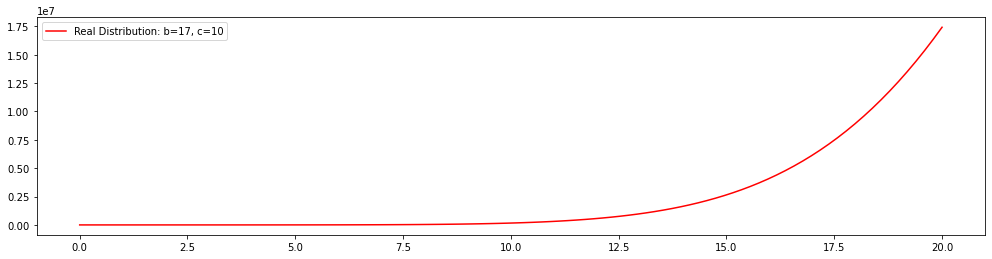

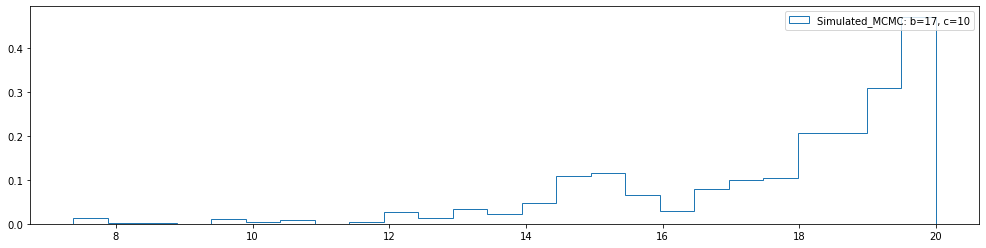

<ipython-input-21-ee19ff552366>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return ((x**(c-1))/(ss.gamma(c)*(b**c)))**(-x/b)


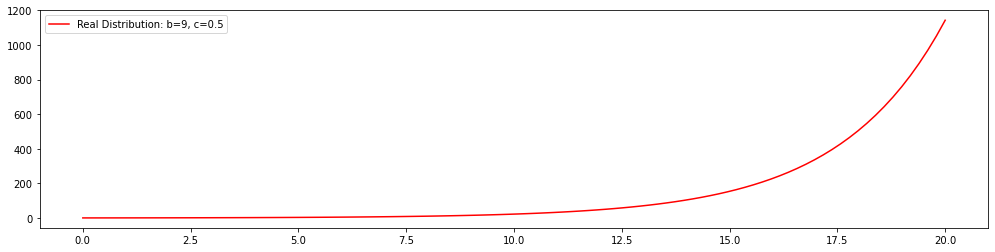

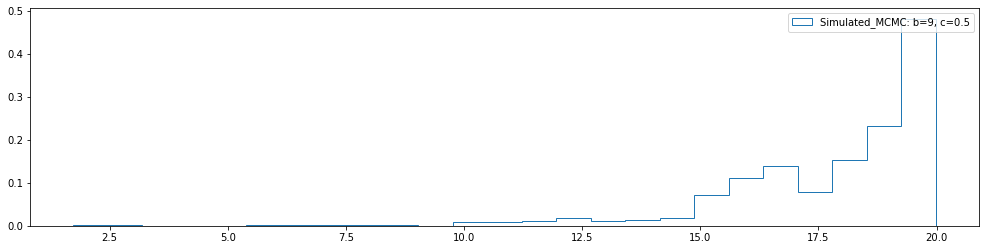

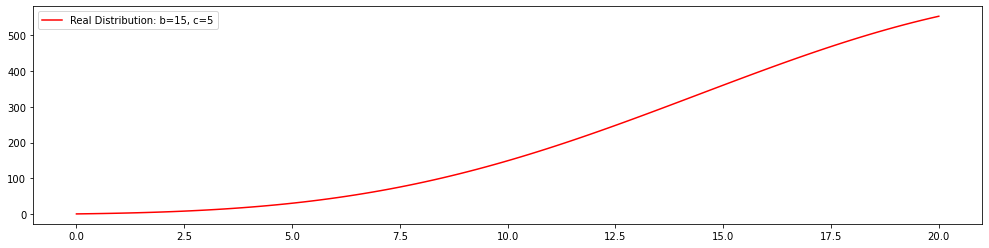

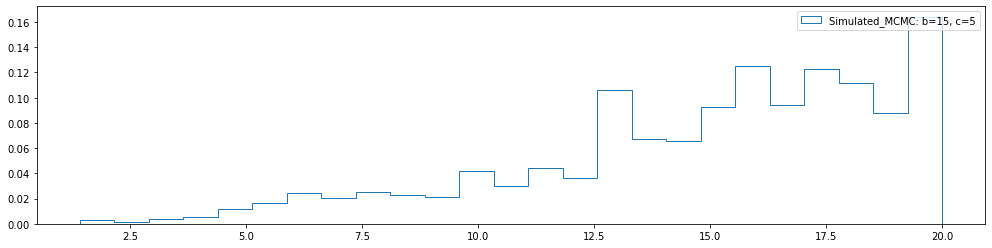

In [25]:
#Realizamos varias gráficas(con distintos parámetros) de las funciones.
#Hay que destacar que es necesario realizar las gráficas separadas, puesto que la escala es diferente, sin embargo,
#se puede evidenciar que ambas funciones tienen el mismo comportamiento
plot_gprop(17,10)
plot_gprop(9,0.5)
plot_gprop(15,5)


        